**Assignment 5: Classification**

Team Fatboys: Edric Tam, Kevin Huang, Ivan Kuznetsov

Heavily adopted code and format from greilliam

**State assumptions**

Let y = 0 denote that a particular synapse is glutamatergic(high brightness of VGlut1) and y = 1 denote that a particular synapse is not glutamatergic(low brightness of VGlut1). This would serve as our labels for classification. We set the threshold to be the mean of the local brightness of VGlut1.

For our null generative model that we sample from, we assume that all the features (local brightness of other markers) as well as the VGlut1 brightness that we are looking at are sampled from Gaussian distributions. Each feature will be sampled independently from a Gaussian with a certain mean and variance. In our code below, we generate the mean and variance randomly. 

Formally, we assume for each feature $X_i \sim N(\mu_i, \sigma_i^2)$, for the labels $Y \sim N(\mu, \sigma^2)$

Where each $\mu_i,\sigma_i$ are randomly sampled from a uniform distribution between 0 and 1. 

**Formally Define classification/regression problem**

We seek to define a classifier $S: X \rightarrow Y$ such that the value $\sum_{i = 1}^{n}\theta(S({X_i}) \neq Y_i)$ is minimized where $\theta$ is the indicator function.


**Provide algorithm for solving problem (including choosing hyperparameters as appropriate)**

classification:

lda (linear discriminant analysis): no parameters

qda (quadratic discriminant analysis): no parameters

svm (support vector machine): penalty parameters set to 0.5 because it was a default suggested

knn (k-nearest neighbours): number of neighbors set to 3 because it was a default suggested

rf (random forest): same as above


In [3]:
import numpy as np
# import matplotlib.pyplot as plt
import os
import csv
import pickle

from sklearn import cross_validation
from sklearn.cross_validation import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


#%matplotlib inline

np.random.seed(12345678)  # for reproducibility, set random seed
r = 24  # define number of rois
N = 100 # number of samples at each iteration
# p0 = 0.5
miu = np.random.rand(r)
sigma = np.random.rand(r)
# p1 = 0.5
# define number of subjects per class
S = np.array((100, 120, 200, 320, 400, 800, 1000))

names = ["Nearest Neighbors", "Linear SVM", "Random Forest",
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]



accuracy = np.zeros((len(S), len(classifiers), 2), dtype=np.dtype('float64'))
for idx1, s in enumerate(S):
    allFeatures = [np.random.normal(miu[i], sigma[i], s) for i in range(0,r-1)]
    X = np.empty([r-1,s])
    for i in range(0,r-1):
        for q in range(0,s):
            X[i,q] = allFeatures[i][q]
    X = np.array(allFeatures).T
    y = np.random.normal(miu[r-1], sigma[r-1], s)
    threshold = np.median(y)
    y = [(m > threshold) for m in y]
    
    for idx2, cla in enumerate(classifiers):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
        clf = cla.fit(X_train, y_train)
        loo = LeaveOneOut(len(X))
        scores = cross_validation.cross_val_score(clf, X, y, cv=loo)
        accuracy[idx1, idx2,] = [scores.mean(), scores.std()]
        print("Accuracy of %s: %0.2f (+/- %0.2f)" % (names[idx2], scores.mean(), scores.std() * 2))
    
print accuracy



Accuracy of Nearest Neighbors: 0.51 (+/- 1.00)
Accuracy of Linear SVM: 0.53 (+/- 1.00)
Accuracy of Random Forest: 0.50 (+/- 1.00)
Accuracy of Linear Discriminant Analysis: 0.54 (+/- 1.00)
Accuracy of Quadratic Discriminant Analysis: 0.54 (+/- 1.00)
Accuracy of Nearest Neighbors: 0.57 (+/- 0.99)
Accuracy of Linear SVM: 0.51 (+/- 1.00)
Accuracy of Random Forest: 0.53 (+/- 1.00)
Accuracy of Linear Discriminant Analysis: 0.47 (+/- 1.00)
Accuracy of Quadratic Discriminant Analysis: 0.47 (+/- 1.00)
Accuracy of Nearest Neighbors: 0.49 (+/- 1.00)
Accuracy of Linear SVM: 0.50 (+/- 1.00)
Accuracy of Random Forest: 0.53 (+/- 1.00)
Accuracy of Linear Discriminant Analysis: 0.56 (+/- 0.99)
Accuracy of Quadratic Discriminant Analysis: 0.51 (+/- 1.00)
Accuracy of Nearest Neighbors: 0.46 (+/- 1.00)
Accuracy of Linear SVM: 0.50 (+/- 1.00)
Accuracy of Random Forest: 0.50 (+/- 1.00)
Accuracy of Linear Discriminant Analysis: 0.48 (+/- 1.00)
Accuracy of Quadratic Discriminant Analysis: 0.48 (+/- 1.00)
Accu

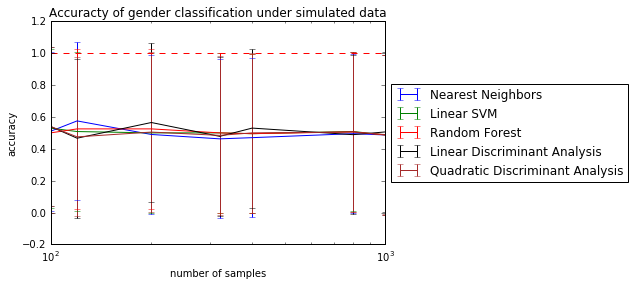

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

S = np.array((100, 120, 200, 320, 400, 800, 1000))

plt.errorbar(S, accuracy[:,0,0], yerr = accuracy[:,0,1], hold=True, label=names[0])
plt.errorbar(S, accuracy[:,1,0], yerr = accuracy[:,1,1], color='green', hold=True, label=names[1])
plt.errorbar(S, accuracy[:,2,0], yerr = accuracy[:,2,1], color='red', hold=True, label=names[2])
plt.errorbar(S, accuracy[:,3,0], yerr = accuracy[:,3,1], color='black', hold=True, label=names[3])
plt.errorbar(S, accuracy[:,4,0], yerr = accuracy[:,4,1], color='brown', hold=True, label=names[4])
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.title('Accuracty of gender classification under simulated data')
plt.axhline(1, color='red', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [5]:
np.random.seed(12345678)  # for reproducibility, set random seed
r = 24  # define number of rois

names = ["Nearest Neighbors", "Linear SVM", "Random Forest",
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

dataFile = open('local_brightness.p')
realData = pickle.load(dataFile)
labels = realData[3]
numSubject = len(labels)
features = np.empty([r,numSubject])
for i in range(0,r):
    for j in range(0,numSubject):
        features[i,j]= realData[i+1][j]
        if(i == 3-1):
            features[i,j] = 0
X = np.array(features).T
X = X[0:1000,:]
thresholdReal = np.mean(labels)
Y= [(i > thresholdReal) for i in labels]
y = Y[0:1000]

print X.shape

accuracy=np.zeros((len(classifiers),2))
for idx, cla in enumerate(classifiers):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
    clf = cla.fit(X_train, y_train)
    loo = LeaveOneOut(len(X))
    scores = cross_validation.cross_val_score(clf, X, y, cv=loo)
    accuracy[idx,] = [scores.mean(), scores.std()]
    print("Accuracy of %s: %0.2f (+/- %0.2f)" % (names[idx], scores.mean(), scores.std() * 2))

(1000, 24)
Accuracy of Nearest Neighbors: 0.82 (+/- 0.77)
Accuracy of Linear SVM: 0.81 (+/- 0.78)
Accuracy of Random Forest: 0.79 (+/- 0.81)
Accuracy of Linear Discriminant Analysis: 0.85 (+/- 0.71)

/Users/kyypgh/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/kyypgh/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Accuracy of Quadratic Discriminant Analysis: 0.60 (+/- 0.98)


***Reflect on result***

The classification accuracy on real data based on the five tested classifiers around the low 80s. (quite high)
The classification accuracy on our null model of independent Gaussian-distributed features is slightly better than chance at around the low 50s. This means that the features of true data is likely not independent and highly correlated. The marginal plots of the features does look bell-curve like though, so the gaussian assumption is not out of nowhere.

Next, We need to test new assumptions and new distributions to sample from, most likely sampling from Gaussians that are correlated. Also, we can calculate means and stdevs fromt the real data, and then construct the parametric gaussian model based on those values to see if we can get a better null distribution.